In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [5]:
mail_df=pd.read_csv("email_spam.csv")

In [6]:
mail_df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


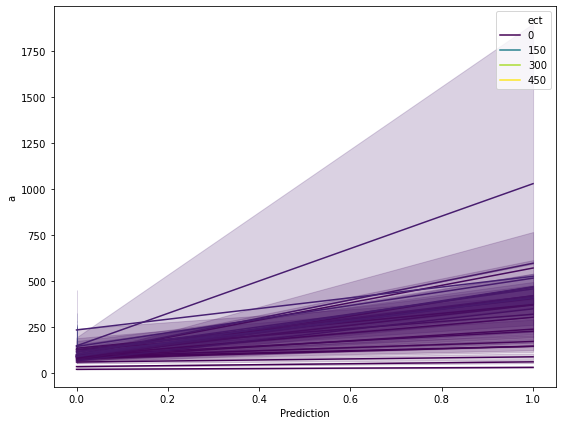

In [8]:
plt.figure(figsize=(9,7))
sns.lineplot('Prediction','a',hue='ect',data=mail_df,palette='viridis')

In [11]:
mail_df.dropna(axis=0,subset=['Prediction'],inplace=True)
y=mail_df.Prediction
X=mail_df.drop('Prediction',axis=1)

In [12]:
X.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,1,0


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

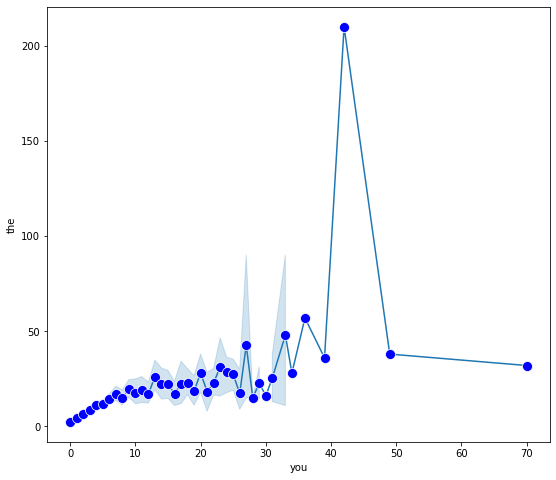

In [14]:
plt.figure(figsize=(9,8))
sns.lineplot('you','the',data=X,marker='o',markerfacecolor='blue',markersize='10')

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

object_cols=[col for col in X_train.columns if
            X_train[col].dtype=="object"]
good_cols=[col for col in object_cols if
          set(X_train[col])==set(X_test[col])]
bad_cols=list(set(object_cols)-set(good_cols))

In [17]:
label_train=X_train.drop(bad_cols,axis=1)
label_test=X_test.drop(bad_cols,axis=1)

In [18]:
label_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3314,0,0,2,4,1,0,26,2,0,5,...,0,0,0,0,0,0,0,0,1,0
4391,14,22,5,19,5,6,157,4,0,44,...,0,0,0,1,1,0,0,0,4,0
4020,2,0,3,1,0,0,7,0,0,1,...,0,0,0,0,0,0,0,0,2,0
3489,0,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4165,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for col in good_cols:
    label_train[col]=pd.DataFrame(encode.fit_transform(label_train[col]))
    label_test[col]=pd.DataFrame(encode.transform(label_test[col]))

In [20]:
label_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3314,0,0,2,4,1,0,26,2,0,5,...,0,0,0,0,0,0,0,0,1,0
4391,14,22,5,19,5,6,157,4,0,44,...,0,0,0,1,1,0,0,0,4,0
4020,2,0,3,1,0,0,7,0,0,1,...,0,0,0,0,0,0,0,0,2,0
3489,0,0,1,0,1,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4165,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
scaled_f=scaler.fit_transform(label_train)
scaled_f1=scaler.fit_transform(label_test)

In [23]:
label_train_sc=pd.DataFrame(scaled_f,columns=label_train.columns)
label_test_sc1=pd.DataFrame(scaled_f1,columns=label_test.columns)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150)
model.fit(label_train_sc,y_train)
preds=model.predict(label_test_sc1)

In [25]:
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       750
           1       0.94      0.96      0.95       285

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

[[734  16]
 [ 11 274]]


In [26]:
label_train_sc.shape

(4137, 3000)

In [28]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier(learning_rate=0.1)
cb.fit(label_train_sc,y_train)
pred=cb.predict(label_test_sc1)

0:	learn: 0.5675700	total: 87.8ms	remaining: 1m 27s
1:	learn: 0.5050021	total: 117ms	remaining: 58.3s
2:	learn: 0.4467698	total: 144ms	remaining: 47.9s
3:	learn: 0.3967837	total: 171ms	remaining: 42.5s
4:	learn: 0.3700193	total: 197ms	remaining: 39.3s
5:	learn: 0.3403716	total: 224ms	remaining: 37.2s
6:	learn: 0.3173621	total: 247ms	remaining: 35.1s
7:	learn: 0.3006945	total: 267ms	remaining: 33.2s
8:	learn: 0.2871156	total: 291ms	remaining: 32s
9:	learn: 0.2756094	total: 311ms	remaining: 30.8s
10:	learn: 0.2615262	total: 333ms	remaining: 29.9s
11:	learn: 0.2529668	total: 352ms	remaining: 29s
12:	learn: 0.2404150	total: 373ms	remaining: 28.3s
13:	learn: 0.2287352	total: 393ms	remaining: 27.7s
14:	learn: 0.2245247	total: 413ms	remaining: 27.1s
15:	learn: 0.2157014	total: 434ms	remaining: 26.7s
16:	learn: 0.2069149	total: 454ms	remaining: 26.2s
17:	learn: 0.2012088	total: 477ms	remaining: 26s
18:	learn: 0.1962874	total: 498ms	remaining: 25.7s
19:	learn: 0.1902691	total: 523ms	remaining: 

161:	learn: 0.0418203	total: 3.69s	remaining: 19.1s
162:	learn: 0.0414851	total: 3.72s	remaining: 19.1s
163:	learn: 0.0411283	total: 3.75s	remaining: 19.1s
164:	learn: 0.0408950	total: 3.78s	remaining: 19.1s
165:	learn: 0.0408519	total: 3.81s	remaining: 19.1s
166:	learn: 0.0404294	total: 3.84s	remaining: 19.1s
167:	learn: 0.0400654	total: 3.86s	remaining: 19.1s
168:	learn: 0.0398602	total: 3.88s	remaining: 19.1s
169:	learn: 0.0394337	total: 3.9s	remaining: 19.1s
170:	learn: 0.0392462	total: 3.93s	remaining: 19s
171:	learn: 0.0387477	total: 3.95s	remaining: 19s
172:	learn: 0.0384124	total: 3.98s	remaining: 19s
173:	learn: 0.0383897	total: 4s	remaining: 19s
174:	learn: 0.0382253	total: 4.02s	remaining: 18.9s
175:	learn: 0.0377660	total: 4.04s	remaining: 18.9s
176:	learn: 0.0373597	total: 4.06s	remaining: 18.9s
177:	learn: 0.0370732	total: 4.09s	remaining: 18.9s
178:	learn: 0.0367592	total: 4.11s	remaining: 18.8s
179:	learn: 0.0363328	total: 4.13s	remaining: 18.8s
180:	learn: 0.0360410	to

328:	learn: 0.0170210	total: 7.32s	remaining: 14.9s
329:	learn: 0.0168669	total: 7.35s	remaining: 14.9s
330:	learn: 0.0167742	total: 7.37s	remaining: 14.9s
331:	learn: 0.0166762	total: 7.4s	remaining: 14.9s
332:	learn: 0.0166707	total: 7.42s	remaining: 14.9s
333:	learn: 0.0164482	total: 7.44s	remaining: 14.8s
334:	learn: 0.0163444	total: 7.46s	remaining: 14.8s
335:	learn: 0.0162436	total: 7.49s	remaining: 14.8s
336:	learn: 0.0161411	total: 7.51s	remaining: 14.8s
337:	learn: 0.0161034	total: 7.54s	remaining: 14.8s
338:	learn: 0.0160168	total: 7.57s	remaining: 14.8s
339:	learn: 0.0159375	total: 7.6s	remaining: 14.8s
340:	learn: 0.0159324	total: 7.63s	remaining: 14.7s
341:	learn: 0.0157998	total: 7.66s	remaining: 14.7s
342:	learn: 0.0157546	total: 7.69s	remaining: 14.7s
343:	learn: 0.0157019	total: 7.71s	remaining: 14.7s
344:	learn: 0.0155881	total: 7.74s	remaining: 14.7s
345:	learn: 0.0155250	total: 7.77s	remaining: 14.7s
346:	learn: 0.0155206	total: 7.8s	remaining: 14.7s
347:	learn: 0.0

492:	learn: 0.0097600	total: 10.9s	remaining: 11.2s
493:	learn: 0.0097587	total: 10.9s	remaining: 11.2s
494:	learn: 0.0097578	total: 10.9s	remaining: 11.1s
495:	learn: 0.0097565	total: 10.9s	remaining: 11.1s
496:	learn: 0.0097530	total: 11s	remaining: 11.1s
497:	learn: 0.0097518	total: 11s	remaining: 11.1s
498:	learn: 0.0097506	total: 11s	remaining: 11s
499:	learn: 0.0097114	total: 11s	remaining: 11s
500:	learn: 0.0097102	total: 11s	remaining: 11s
501:	learn: 0.0097090	total: 11.1s	remaining: 11s
502:	learn: 0.0097079	total: 11.1s	remaining: 11s
503:	learn: 0.0097048	total: 11.1s	remaining: 10.9s
504:	learn: 0.0097039	total: 11.1s	remaining: 10.9s
505:	learn: 0.0097028	total: 11.1s	remaining: 10.9s
506:	learn: 0.0097017	total: 11.2s	remaining: 10.9s
507:	learn: 0.0096625	total: 11.2s	remaining: 10.8s
508:	learn: 0.0096613	total: 11.2s	remaining: 10.8s
509:	learn: 0.0096607	total: 11.2s	remaining: 10.8s
510:	learn: 0.0096606	total: 11.2s	remaining: 10.8s
511:	learn: 0.0096428	total: 11.

658:	learn: 0.0071131	total: 14.5s	remaining: 7.49s
659:	learn: 0.0071131	total: 14.5s	remaining: 7.46s
660:	learn: 0.0071001	total: 14.5s	remaining: 7.44s
661:	learn: 0.0070733	total: 14.5s	remaining: 7.42s
662:	learn: 0.0070728	total: 14.6s	remaining: 7.4s
663:	learn: 0.0070625	total: 14.6s	remaining: 7.37s
664:	learn: 0.0070625	total: 14.6s	remaining: 7.35s
665:	learn: 0.0070393	total: 14.6s	remaining: 7.33s
666:	learn: 0.0070205	total: 14.6s	remaining: 7.3s
667:	learn: 0.0070205	total: 14.6s	remaining: 7.28s
668:	learn: 0.0070155	total: 14.7s	remaining: 7.26s
669:	learn: 0.0069974	total: 14.7s	remaining: 7.24s
670:	learn: 0.0069969	total: 14.7s	remaining: 7.21s
671:	learn: 0.0069743	total: 14.7s	remaining: 7.19s
672:	learn: 0.0069742	total: 14.7s	remaining: 7.17s
673:	learn: 0.0069547	total: 14.8s	remaining: 7.14s
674:	learn: 0.0069547	total: 14.8s	remaining: 7.12s
675:	learn: 0.0069546	total: 14.8s	remaining: 7.1s
676:	learn: 0.0069443	total: 14.8s	remaining: 7.07s
677:	learn: 0.0

823:	learn: 0.0056307	total: 17.9s	remaining: 3.81s
824:	learn: 0.0056304	total: 17.9s	remaining: 3.79s
825:	learn: 0.0056300	total: 17.9s	remaining: 3.77s
826:	learn: 0.0056299	total: 17.9s	remaining: 3.75s
827:	learn: 0.0056223	total: 17.9s	remaining: 3.72s
828:	learn: 0.0056223	total: 17.9s	remaining: 3.7s
829:	learn: 0.0056223	total: 18s	remaining: 3.68s
830:	learn: 0.0056092	total: 18s	remaining: 3.66s
831:	learn: 0.0055972	total: 18s	remaining: 3.63s
832:	learn: 0.0055867	total: 18s	remaining: 3.61s
833:	learn: 0.0055767	total: 18s	remaining: 3.59s
834:	learn: 0.0055767	total: 18.1s	remaining: 3.57s
835:	learn: 0.0055767	total: 18.1s	remaining: 3.55s
836:	learn: 0.0055766	total: 18.1s	remaining: 3.52s
837:	learn: 0.0055766	total: 18.1s	remaining: 3.5s
838:	learn: 0.0055577	total: 18.1s	remaining: 3.48s
839:	learn: 0.0055577	total: 18.2s	remaining: 3.46s
840:	learn: 0.0055577	total: 18.2s	remaining: 3.44s
841:	learn: 0.0055407	total: 18.2s	remaining: 3.42s
842:	learn: 0.0055248	to

983:	learn: 0.0049559	total: 21.3s	remaining: 346ms
984:	learn: 0.0049559	total: 21.3s	remaining: 325ms
985:	learn: 0.0049559	total: 21.3s	remaining: 303ms
986:	learn: 0.0049559	total: 21.4s	remaining: 281ms
987:	learn: 0.0049510	total: 21.4s	remaining: 260ms
988:	learn: 0.0049509	total: 21.4s	remaining: 238ms
989:	learn: 0.0049398	total: 21.4s	remaining: 216ms
990:	learn: 0.0049397	total: 21.4s	remaining: 195ms
991:	learn: 0.0049397	total: 21.5s	remaining: 173ms
992:	learn: 0.0049396	total: 21.5s	remaining: 151ms
993:	learn: 0.0049395	total: 21.5s	remaining: 130ms
994:	learn: 0.0049394	total: 21.5s	remaining: 108ms
995:	learn: 0.0049394	total: 21.5s	remaining: 86.5ms
996:	learn: 0.0049394	total: 21.6s	remaining: 64.9ms
997:	learn: 0.0049394	total: 21.6s	remaining: 43.3ms
998:	learn: 0.0049215	total: 21.6s	remaining: 21.6ms
999:	learn: 0.0049119	total: 21.6s	remaining: 0us


In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       750
           1       0.96      0.97      0.96       285

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035

